In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

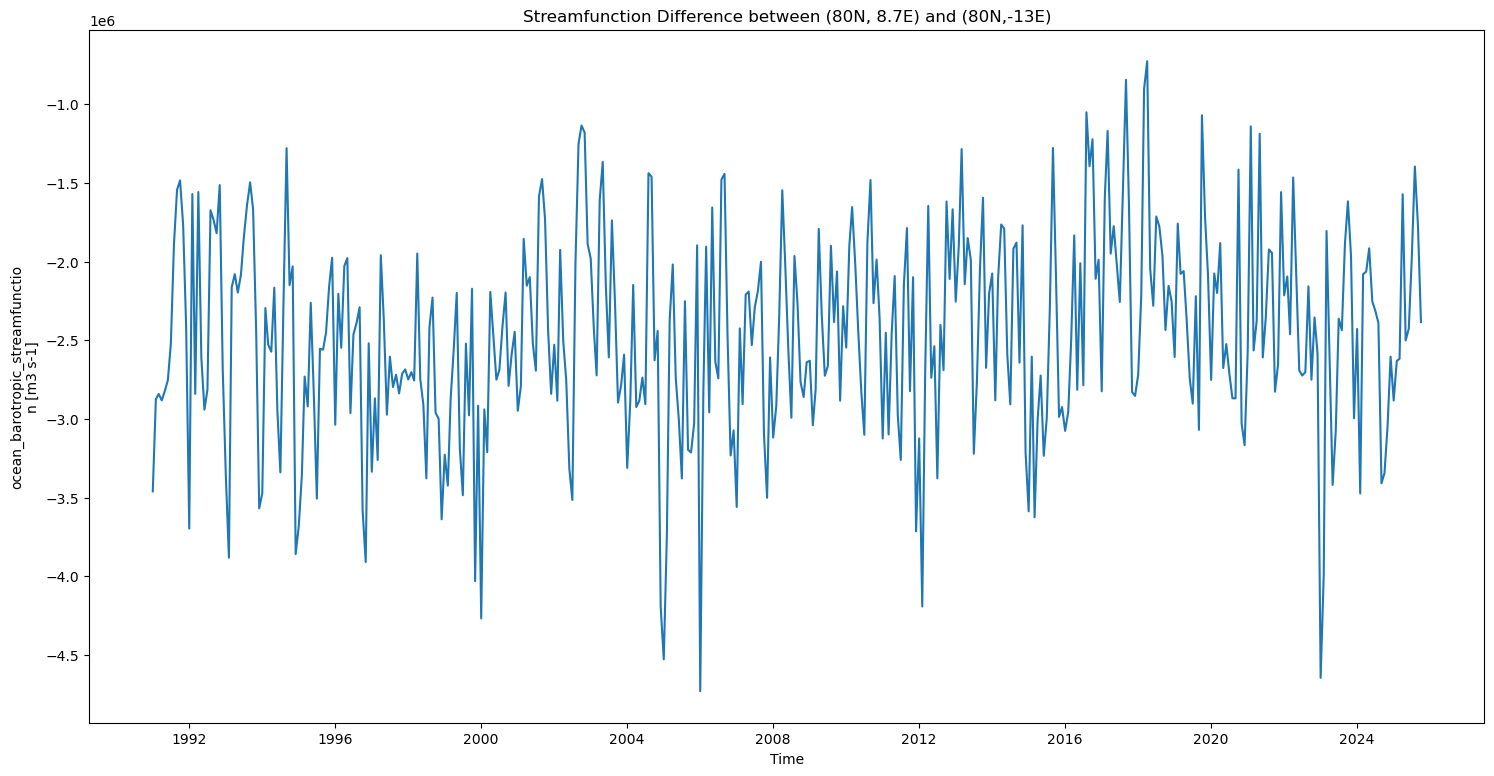

In [12]:
ds = xr.open_dataset("cmems_mod_arc_phy_my_topaz4_P1M_stfbaro_180.00W-179.88E_50.00N-90.00N_1991-01-01-2025-10-01.nc")
var = "stfbaro"

def extract_point(ds, var, lat, lon):
    return ds[var].sel(latitude=lat, longitude=lon, method="nearest")

latN = 80
lonE = 8.7

latN2 = 80
lonW = -13

p_east = extract_point(ds, var, latN, lonE)
p_west = extract_point(ds, var, latN2, lonW)

diff = p_east - p_west
diff.plot(figsize=(18,9))
plt.title(f"Streamfunction Difference between ({latN}N, {lonE}E) and ({latN2}N,{lonW}E)")
plt.savefig("streamfunction_diff.png")
plt.show()


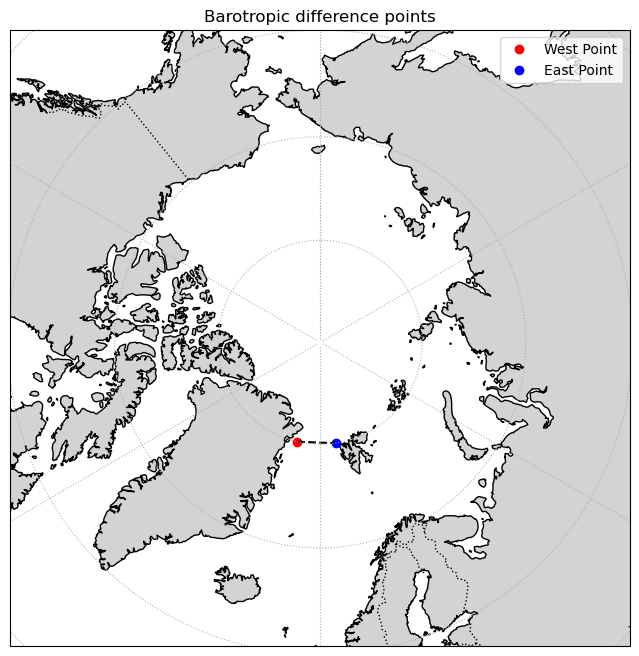

In [11]:
# Create figure with Polar Stereo projection
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

# Set Arctic extent (adjust if needed)
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

# Add coastlines and land
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Plot the two points
ax.plot(lonW, latN2, 'ro', transform=ccrs.PlateCarree(), label="West Point")
ax.plot(lonE, latN, 'bo', transform=ccrs.PlateCarree(), label="East Point")

# Dashed line between them
ax.plot(
    [lonW, lonE],
    [latN, latN2],
    linestyle="--",
    color="black",
    transform=ccrs.PlateCarree()
)

# Optional: gridlines
gl = ax.gridlines(draw_labels=False, linestyle=":")
gl.top_labels = False
gl.right_labels = False

plt.legend()
plt.title("Barotropic difference points")
plt.show()
